In [103]:
from histogram import *
import matplotlib.pyplot as plt

(385, 435, 161)
184
(32, 1, 7)
(32, 7)
[16 21  7 12 25 26 23]


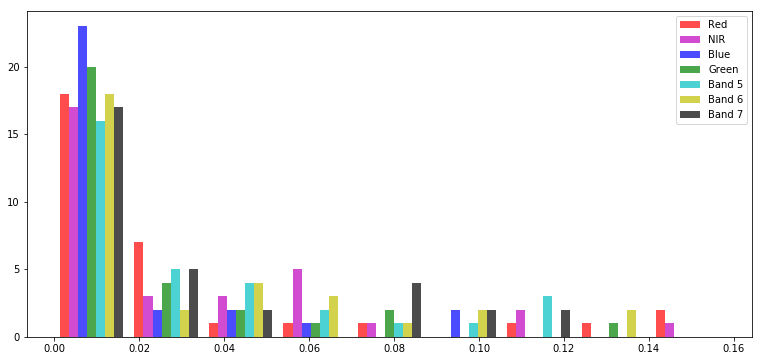

In [2]:
img_list = get_county_data('Afg', 'level1', '', 'MODIS', '1_275.tif')
hist = calc_histograms(img_list[0], 7, 32)
print(hist.shape)
sq = hist.squeeze()
print(sq.shape)
idx = np.argmax(sq, axis=0) # (7,)
print(idx)
plt.figure(figsize=(13,6))
n, bins, patches = plt.hist(x=sq, bins='auto', alpha=0.7, rwidth=0.85, color=['r', 'm', 'b', 'g', 'c', 'y', 'k'], label=['Red','NIR','Blue','Green','Band 5','Band 6', 'Band 7'])
leg = plt.legend()
plt.show()



In [78]:
np.nan + 1

nan

In [102]:
vegimg = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray()),axes=(1,2,0))
print(vegimg.shape)

print('mask count ', np.sum(np.where(np.sum(vegimg, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg = vegimg*nan_mask
print('ndvi mask',np.nanmean(vegimg[:,:,0]))
print('evi mask', np.nanmean(vegimg[:,:,1]))


###########
vegimg = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray(), dtype='int16'),axes=(1,2,0))

print('int mask count ', np.sum(np.where(np.sum(vegimg, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg = vegimg*nan_mask
print('int ndvi mask',np.nanmean(vegimg[:,:,0]))
print('int evi mask', np.nanmean(vegimg[:,:,1]))


###########
"""vegimg = np.transpose(np.array(gdal.Open('1_272_veg.tif').ReadAsArray()),axes=(1,2,0))
vegimg_add = (np.where(vegimg < 0, vegimg+101, vegimg)).astype(np.uint16)

negs = np.sum(np.where(vegimg_add < 0, 1, 0))
total_pix = vegimg.shape[0]*vegimg.shape[1]*vegimg.shape[2]

zeros = np.sum(np.where(vegimg_add == 0, 1, 0))
print('add ratio zeros ',zeros/total_pix)

print('add ndvi',np.nanmean(vegimg_add[0]))
print('add evi', np.nanmean(vegimg_add[1]))

print('add mask count ', np.sum(np.where(np.sum(vegimg_add, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg_add, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg_add = vegimg_add*nan_mask
print('add ndvi mask',np.nanmean(vegimg_add[0]))
print('add evi mask', np.nanmean(vegimg_add[1]))

############


###########
vegimg = np.transpose(np.array(gdal.Open('1_272_veg.tif').ReadAsArray()),axes=(1,2,0))
vegi = np.where(vegimg < 0, np.nan, vegimg)

negs = np.sum(np.where(vegi < 0, 1, 0))
total_pix = vegimg.shape[0]*vegimg.shape[1]*vegimg.shape[2]

zeros = np.sum(np.where(vegi == 0, 1, 0))
print('nan ratio zeros ',zeros/total_pix)

print('nan ndvi',np.nanmean(vegi[0]))
print('nan evi', np.nanmean(vegi[1]))

print('nan mask count ', np.sum(np.where(np.sum(vegi, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegi, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegi = vegi*nan_mask
print('nan ndvi mask',np.nanmean(vegi[0]))
print('nan evi mask', np.nanmean(vegi[1]))


###########
vegimg = np.transpose(np.array(gdal.Open('1_272_veg.tif').ReadAsArray()),axes=(1,2,0))
vegimg_add = (np.where(vegimg < 0, 0, vegimg)).astype(np.uint16)

negs = np.sum(np.where(vegimg_add < 0, 1, 0))
total_pix = vegimg.shape[0]*vegimg.shape[1]*vegimg.shape[2]

zeros = np.sum(np.where(vegimg_add == 0, 1, 0))
print('zero ratio zeros ',zeros/total_pix)

print('zero ndvi',np.nanmean(vegimg_add[0]))
print('zero evi', np.nanmean(vegimg_add[1]))

print('zero mask count ', np.sum(np.where(np.sum(vegimg_add, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg_add, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg_add = vegimg_add*nan_mask
print('zero ndvi mask',np.nanmean(vegimg_add[0]))
print('zero evi mask', np.nanmean(vegimg_add[1]))

############"""

vegimg = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray(), dtype='uint16'),axes=(1,2,0))


print('uint mask count ', np.sum(np.where(np.sum(vegimg, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg = vegimg*nan_mask
print('uint ndvi mask',np.nanmean(vegimg[:,:,0]))
print('uint evi mask', np.nanmean(vegimg[:,:,1]))




(385, 435, 161)
mask count  82681
ndvi mask 2564.1424629101116
evi mask 3313.8243153996746
int mask count  82681
int ndvi mask 2564.1424629101116
int evi mask 3313.8243153996746
uint mask count  82681
uint ndvi mask 2564.1424629101116
uint evi mask 3313.8243153996746
(385, 435)


nan
nan
3264608
2506528
34.88188171386719
-0.326991468667984
0.1260882041379156
rep
35.20887318253517
0.0
5771136
0
35.20887318253517
0.0
0.25629746456841807
7.242492501193957
255.0
(32, 339, 532)


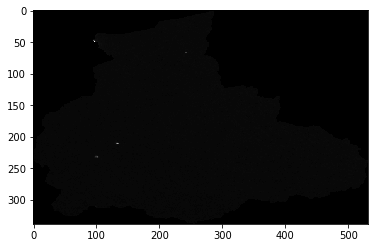

In [126]:
# Display pulled image
img = (np.array(gdal.Open('1_273l.tif').ReadAsArray()))
print(img.max())
print(img.min())
print(np.count_nonzero(~np.isnan(img)))
print(np.count_nonzero(np.isnan(img)))
print(np.nanmax(img))
print(np.nanmin(img))
print(np.nanmean(img))


img = img - np.ones(img.shape)*np.nanmin(img)
img = np.nan_to_num(img)

print('rep')
print(img.max())
print(img.min())
print(np.count_nonzero(~np.isnan(img)))
print(np.count_nonzero(np.isnan(img)))
print(np.nanmax(img))
print(np.nanmin(img))
print(np.nanmean(img))
div = (255*np.ones(img.shape))/(np.nanmax(img))
print(div.max())
img *= div
print(np.nanmax(img))
img = img.astype(np.uint8)
print(img.shape)
plt.imshow(img[0], cmap="gray")
plt.show()

In [114]:
# Display pulled image
img = (np.array(gdal.Open('1_273nobounds.tif').ReadAsArray()))
print(img.max())
print(img.min())
print(np.count_nonzero(~np.isnan(img)))
print(np.count_nonzero(np.isnan(img)))
print(np.nanmax(img))
print(np.nanmin(img))
print(np.nanmean(img))

nan
nan
3264608
2506528
34.88188
-0.32699147
0.12608814


In [13]:
print (img.shape)

(385, 435, 161)


In [10]:
img = img + np.ones(img.shape)*100
print(img.max())
print(img.min())

12229.0
0.0


0.015838509316770187
12229.0
0.0
193.6891304347826
0.0
(385, 435, 3)


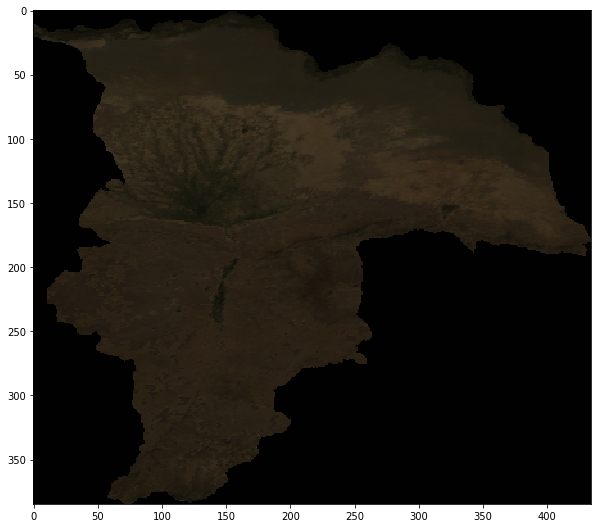

In [38]:
div = (255*np.ones(img.shape))/(16000 + 100)
print(div.max())
#img = img / 12229.0
print(img.max())
print(img.min())
sc_img = img*div
print(sc_img.max())
print(sc_img.min())
rgb = np.dstack((sc_img[:,:,0],sc_img[:,:,3],sc_img[:,:,2]))
rgb8 = rgb.astype(np.uint8)
print(rgb8.shape)
plt.figure(figsize=(10,10))
plt.imshow(rgb8)
plt.show()

In [25]:
def divide_image(img,first,step,num):
    image_list=[]
    for i in range(0,num-1):
        image_list.append(img[:, :, first:first+step])
        first+=step
    image_list.append(img[:, :, first:])
    return image_list

In [ ]:
afg_df = pd.read_pickle('feature_index_afg_pickle')
afg_df = afg_df.sort_index()



In [99]:
MODIS_img = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray(), dtype='uint16'),axes=(1,2,0))
timeseries = divide_image(MODIS_img, 0, 7, int(MODIS_img.shape[2]/7))
new_timeseries = []
for image in timeseries:
    nan_mask = np.where(np.mean(image, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
    image = image*nan_mask
    R_R = np.nanmean(image[:,:,0])
    R_NIR = np.nanmean(image[:,:,1])
    print('u right', (R_NIR - R_R) * 1.0 / (R_NIR + R_R))
    R_R = np.nanmean(image[0])
    R_NIR = np.nanmean(image[1])
    print('u wrong', (R_NIR - R_R) * 1.0 / (R_NIR + R_R))

MODIS_img = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray(), dtype='int16'),axes=(1,2,0))
timeseries = divide_image(MODIS_img, 0, 7, int(MODIS_img.shape[2]/7))
new_timeseries = []
print('\nahhhhhh\n')
for image in timeseries:
    nan_mask = np.where(np.mean(image, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
    image = image*nan_mask
    R_R = np.nanmean(image[:,:,0])
    R_NIR = np.nanmean(image[:,:,1])
    print('i right', (R_NIR - R_R) * 1.0 / (R_NIR + R_R))
    R_R = np.nanmean(image[0])
    R_NIR = np.nanmean(image[1])
    print('i wrong', (R_NIR - R_R) * 1.0 / (R_NIR + R_R))

    

u right 0.12754101558653833
u wrong 0.015124119167919958
u right 0.12368625689339782
u wrong 0.028002679937468182
u right 0.12506040154488585
u wrong -0.0011485056521963102
u right 0.1256537469571528
u wrong 0.019745861837972205
u right 0.12456096607654801
u wrong 0.0010566963237404218
u right 0.12280088510280956
u wrong 0.010146774269668245
u right 0.12187465198526846
u wrong 0.01173596660161046
u right 0.12087675769318434
u wrong -0.010147401746957403
u right 0.11744488853455107
u wrong -0.0022798977500403327
u right 0.11555017447480079
u wrong -0.01910668717151402
u right 0.11517024272493574
u wrong -0.009033447810457984
u right 0.11297744279667368
u wrong -0.015087576085606298
u right 0.11040167564038193
u wrong -0.011018463371054181
u right 0.10541846167350498
u wrong -0.013154538497977613
u right 0.10308696737199372
u wrong -0.0127659574468085
u right 0.10796140203922769
u wrong -0.012173664258636741
u right 0.10089585909173901
u wrong -0.019504623068097426
u right 0.072733759791

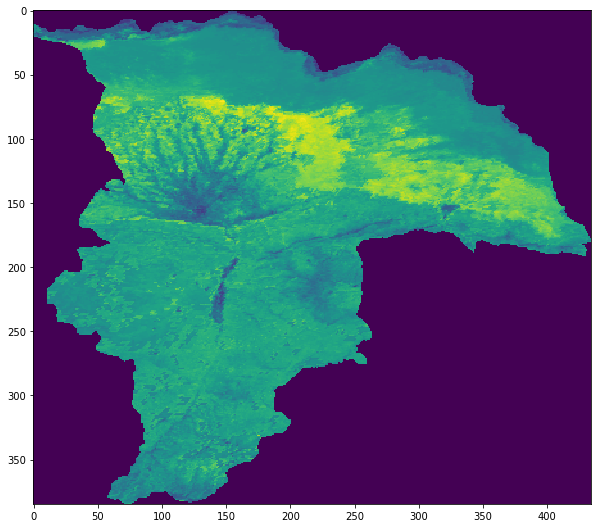

(385, 435, 1)


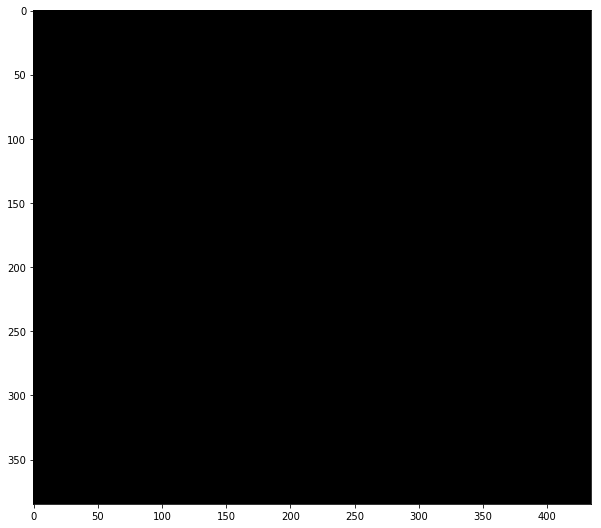

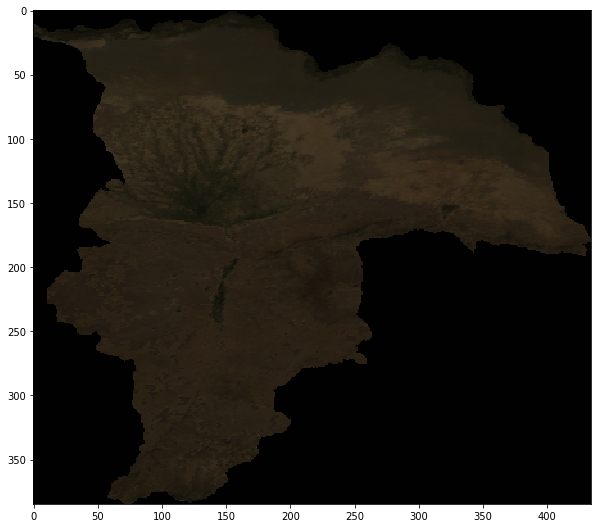

In [65]:

plt.figure(figsize=(10,10))
plt.imshow(rgb8[:,:,0])
plt.show()

white_mask = np.where(np.sum(rgb8, axis = 2) == 0, 255, 0)[:, :, np.newaxis].astype(np.uint8)
print(white_mask.shape)
stack_mask = np.dstack((white_mask,white_mask,white_mask))


plt.figure(figsize=(10,10))
plt.imshow(stack_mask)
plt.show()


#white_mask_d = np.where(rgb == 0, 255, 0).astype(np.uint8)
#print(white_mask_d.shape)


"""plt.figure(figsize=(10,10))
plt.imshow(white_mask_d[:,:,0])
plt.show()"""


image = (rgb+stack_mask).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()




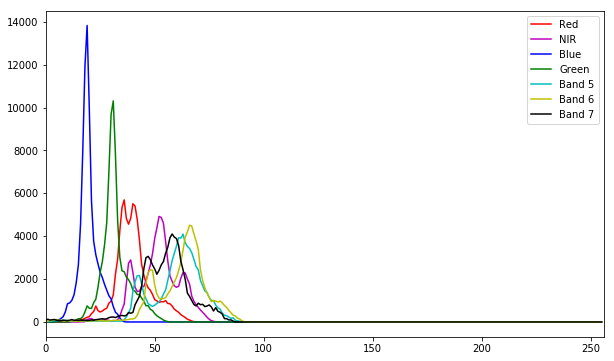

In [7]:
#img = cv2.imread('home.jpg')
color = ('r', 'm', 'b', 'g', 'c', 'y', 'k')
labels = ['Red', 'NIR', 'Blue', 'Green', 'Band 5', 'Band 6', 'Band 7']
plt.figure(figsize=(10,6))
for i,col in enumerate(color):
    #histr = cv2.calcHist([img],[i],None,[256],[0,256])
    histr,bins = np.histogram(sc_img[i].ravel(),256, [2,256])
    plt.plot(histr,color = col, label = labels[i])
    leg = plt.legend()
    plt.xlim([0,256])
plt.show()

In [8]:
start = pd.to_datetime('2016-6-30', format='%Y-%m-%d', utc=True)
end = pd.to_datetime('2016-12-31', format='%Y-%m-%d', utc=True)
dummy_years(img, start, 184)

184


[Timestamp('2016-06-30 00:00:00+0000', tz='UTC'),
 Timestamp('2016-07-08 00:00:00+0000', tz='UTC'),
 Timestamp('2016-07-16 00:00:00+0000', tz='UTC'),
 Timestamp('2016-07-24 00:00:00+0000', tz='UTC'),
 Timestamp('2016-08-01 00:00:00+0000', tz='UTC'),
 Timestamp('2016-08-09 00:00:00+0000', tz='UTC'),
 Timestamp('2016-08-17 00:00:00+0000', tz='UTC'),
 Timestamp('2016-08-25 00:00:00+0000', tz='UTC'),
 Timestamp('2016-09-02 00:00:00+0000', tz='UTC'),
 Timestamp('2016-09-10 00:00:00+0000', tz='UTC'),
 Timestamp('2016-09-18 00:00:00+0000', tz='UTC'),
 Timestamp('2016-09-26 00:00:00+0000', tz='UTC'),
 Timestamp('2016-10-04 00:00:00+0000', tz='UTC'),
 Timestamp('2016-10-12 00:00:00+0000', tz='UTC'),
 Timestamp('2016-10-20 00:00:00+0000', tz='UTC'),
 Timestamp('2016-10-28 00:00:00+0000', tz='UTC'),
 Timestamp('2016-11-05 00:00:00+0000', tz='UTC'),
 Timestamp('2016-11-13 00:00:00+0000', tz='UTC'),
 Timestamp('2016-11-21 00:00:00+0000', tz='UTC'),
 Timestamp('2016-11-29 00:00:00+0000', tz='UTC'),
